<a href="https://colab.research.google.com/github/mdsaniulbasirsaz/Deep-Learning/blob/main/LinearModel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

import torch


In [11]:
x = torch.tensor([5.0, 3.5, 2.0])
a = torch.tensor(10.0)
b = torch.tensor(40.0)
y = 10*x + b

print("Values of Y:", y.tolist())

Values of Y: [90.0, 75.0, 60.0]


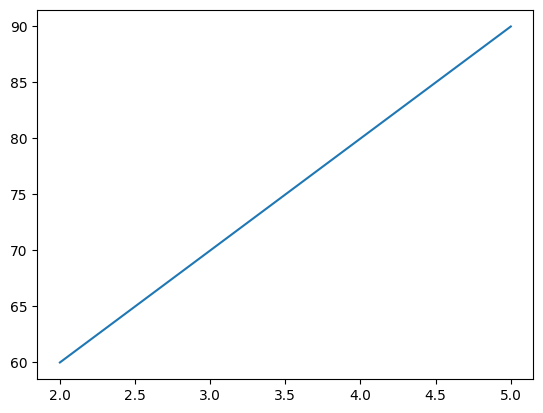

In [12]:
import matplotlib.pyplot as plt

xs = x.numpy()
ys = y.numpy()

plt.plot(xs, ys)
